In [1]:
import numpy as np

import matplotlib.pyplot as plt

import csv

import re

import pandas as pd

import os
import sys

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))


In [2]:
filenames = []
event_nums = []
random_range_strs = []

filenames.append("lhagaman_extunbiased_bnb_1g_overlay_run4")
event_nums.append(352037)
random_range_strs.append("[0.848, 0.95)")

filenames.append("lhagaman_extunbiased_bnb_1g_overlay_run5")
event_nums.append(234021)
random_range_strs.append("[0.848, 0.95)")


# from https://docs.google.com/spreadsheets/d/13a4Igf99cVNudfZXObpqNGSlDnUxlnsyo7c9x2arJWY/edit?gid=1789865876#gid=1789865876
with open("MicroBooNE Production campaign tracker - Run 4_5 input defs.csv", "r") as f:
    reader = csv.reader(f)
    for items in reader:   # <-- iterate over reader, not items_by_row
        if len(items) > 1:
            filename = items[1]
            event_num = items[3]
            random_range_str = items[5]
            if not "prod_" in items[1]:
                continue
            if not event_num:
                continue
            if "none" in random_range_str:
                continue
            if "numi" in filename or "acpt" in filename or "validation" in filename:
                continue

            if filename.endswith("_run4a") or filename.endswith("_run4b") or filename.endswith("_run4c") or filename.endswith("_run4d") or filename.endswith("_run5"):
                random_range_str = "[0, 1]"

            random_range_str = random_range_str.replace("7b [", "[")
            random_range_str = random_range_str.replace("7d [", "[")

            filenames.append(filename)
            event_nums.append(event_num)
            random_range_strs.append(random_range_str)

for i in range(len(filenames)):
    print(str(filenames[i]).ljust(100), str(event_nums[i]).ljust(10), str(random_range_strs[i]).ljust(10))


lhagaman_extunbiased_bnb_1g_overlay_run4                                                             352037     [0.848, 0.95)
lhagaman_extunbiased_bnb_1g_overlay_run5                                                             234021     [0.848, 0.95)
prod_extunbiased_swizzle_crt_inclusive_v7_goodruns_mcc9_run4a                                        573419     [0, 1]    
prod_extunbiased_swizzle_crt_inclusive_v7b_goodruns_mcc9_run4b                                       1841799    [0, 1]    
prod_extunbiased_swizzle_crt_inclusive_v7c_goodruns_mcc9_run4c                                       1086278    [0, 1]    
prod_extunbiased_swizzle_crt_inclusive_v7d_goodruns_mcc9_run4d                                       2152781    [0, 1]    
prod_extunbiased_swizzle_crt_inclusive_v8_goodruns_mcc9_run5                                         2317232    [0, 1]    
prod_extunbiased_swizzle_crt_inclusive_v7_goodruns_mcc9_run4a_bnb_nu_overlay                         203172     [0,0.35)  
prod_extun

In [3]:
num_run4_ext_unbiased_events = 573419+1841799+1086278+2152781
num_run5_ext_unbiased_events = 2317232

print("total run 4 num ext unbiased data events: ", num_run4_ext_unbiased_events)

print("total run 5 num ext unbiased data events: ", num_run5_ext_unbiased_events)


total run 4 num ext unbiased data events:  5654277
total run 5 num ext unbiased data events:  2317232


In [4]:
unique_filetype_range_tups = set()
for i in range(len(filenames)):
    if "nc_kaon" in filenames[i]:
        filetype = "nc_kaon"
    elif "ncpi0" in filenames[i]:
        filetype = "ncpi0"
    elif "COH_pion" in filenames[i]:
        filetype = "COH_pion"
        print("starting with ", filenames[i], "changing to ", filetype)
    elif filenames[i] in ["prod_extunbiased_swizzle_crt_inclusive_v7_goodruns_mcc9_run4a", 
                            "prod_extunbiased_swizzle_crt_inclusive_v7b_goodruns_mcc9_run4b",
                            "prod_extunbiased_swizzle_crt_inclusive_v7c_goodruns_mcc9_run4c",
                            "prod_extunbiased_swizzle_crt_inclusive_v7d_goodruns_mcc9_run4d",
                            "prod_extunbiased_swizzle_crt_inclusive_v8_goodruns_mcc9_run5"]:
        filetype = "ext_unbiased_data"
    elif "bnb" in filenames[i]:
        filetype = filenames[i].split("_bnb_")[-1]
    else:
        print("not explicitly handled: ", filenames[i])
        filetype = filenames[i]
    range_str = random_range_strs[i]

    if "run4" in filenames[i]:
        run = 4
    elif "run5" in filenames[i]:
        run = 5
    else:
        raise ValueError("invalid run number: ", filenames[i])

    run_filetype = f"run{str(run)}_{filetype}"
    
    unique_filetype_range_tups.add((run_filetype, range_str))

for tup in unique_filetype_range_tups:
    print(tup)


starting with  prod_extunbiased_swizzle_crt_inclusive_v7_goodruns_mcc9_run4a_bnb_COH_pion_overlay changing to  COH_pion
starting with  prod_extunbiased_swizzle_crt_inclusive_v7b_goodruns_mcc9_run4b_bnb_COH_pion_overlay changing to  COH_pion
starting with  prod_extunbiased_swizzle_crt_inclusive_v7c_goodruns_mcc9_run4c_bnb_COH_pion_overlay changing to  COH_pion
starting with  prod_extunbiased_swizzle_crt_inclusive_v7d_goodruns_mcc9_run4d_bnb_COH_pion_overlay changing to  COH_pion
starting with  prod_extunbiased_swizzle_crt_inclusive_v8_goodruns_mcc9_run5_COH_pion_overlay changing to  COH_pion
('run5_nu_overlay', '[0,0.35)')
('run5_nc_kaon', '[0.82, 0.84)')
('run4_nuwro_overlay', '[0.55,0.83)')
('run4_1g_overlay_run4', '[0.848, 0.95)')
('run4_dirt_overlay', '[0.765,0.82)')
('run5_ext_unbiased_data', '[0, 1]')
('run4_ncpi0', '[0.66,0.715)')
('run5_ncpi0', '[0.66,0.715)')
('run5_1g_overlay_run5', '[0.848, 0.95)')
('run4_COH_pion', '[0.420,0.425)')
('run4_COH_pion', '[0.420,0.424)')
('run4_e

In [5]:
combined_filenames = []
combined_event_nums = []
combined_random_range_strs = []

for filetype_range_tup in unique_filetype_range_tups:
    combined_filenames.append(filetype_range_tup[0])
    combined_random_range_strs.append(filetype_range_tup[1])
    num_events = 0
    print(filetype_range_tup)
    for i in range(len(filenames)):
        if "nc_kaon" in filenames[i]:
            filetype = "nc_kaon"
        elif "ncpi0" in filenames[i]:
            filetype = "ncpi0"
        elif "COH_pion" in filenames[i]:
            filetype = "COH_pion"
        elif filenames[i] in ["prod_extunbiased_swizzle_crt_inclusive_v7_goodruns_mcc9_run4a", 
                            "prod_extunbiased_swizzle_crt_inclusive_v7b_goodruns_mcc9_run4b",
                            "prod_extunbiased_swizzle_crt_inclusive_v7c_goodruns_mcc9_run4c",
                            "prod_extunbiased_swizzle_crt_inclusive_v7d_goodruns_mcc9_run4d",
                            "prod_extunbiased_swizzle_crt_inclusive_v8_goodruns_mcc9_run5"]:
            filetype = "ext_unbiased_data"
        elif "bnb" in filenames[i]:
            filetype = filenames[i].split("_bnb_")[-1]
        else:
            print("not explicitly handled: ", filenames[i])
            filetype = filenames[i]

        if "run4" in filenames[i]:
            run = 4
        elif "run5" in filenames[i]:
            run = 5
        else:
            raise ValueError("invalid run number: ", filenames[i])

        run_filetype = f"run{str(run)}_{filetype}"

        if run_filetype == filetype_range_tup[0] and random_range_strs[i] == filetype_range_tup[1]:
            print("        adding ", event_nums[i])
            num_events += int(event_nums[i])
            continue

    combined_event_nums.append(num_events)

print(f"{combined_filenames=}")
print(f"{combined_event_nums=}")
print(f"{combined_random_range_strs=}")


('run5_nu_overlay', '[0,0.35)')
        adding  861067
('run5_nc_kaon', '[0.82, 0.84)')
        adding  51389
('run4_nuwro_overlay', '[0.55,0.83)')
        adding  306902
('run4_1g_overlay_run4', '[0.848, 0.95)')
        adding  352037
('run4_dirt_overlay', '[0.765,0.82)')
        adding  32464
        adding  103066
        adding  61036
        adding  117025
('run5_ext_unbiased_data', '[0, 1]')
        adding  2317232
('run4_ncpi0', '[0.66,0.715)')
        adding  31721
        adding  101318
        adding  60902
        adding  118069
('run5_ncpi0', '[0.66,0.715)')
        adding  129750
('run5_1g_overlay_run5', '[0.848, 0.95)')
        adding  234021
('run4_COH_pion', '[0.420,0.425)')
        adding  3291
('run4_COH_pion', '[0.420,0.424)')
        adding  7716
        adding  4691
        adding  9169
('run4_ext_unbiased_data', '[0, 1]')
        adding  573419
        adding  1841799
        adding  1086278
        adding  2152781
('run5_dirt_overlay', '[0.765,0.82)')
        add

In [6]:
for i in range(len(combined_filenames)):
    print(combined_filenames[i], combined_event_nums[i], combined_random_range_strs[i])


run5_nu_overlay 861067 [0,0.35)
run5_nc_kaon 51389 [0.82, 0.84)
run4_nuwro_overlay 306902 [0.55,0.83)
run4_1g_overlay_run4 352037 [0.848, 0.95)
run4_dirt_overlay 313591 [0.765,0.82)
run5_ext_unbiased_data 2317232 [0, 1]
run4_ncpi0 312010 [0.66,0.715)
run5_ncpi0 129750 [0.66,0.715)
run5_1g_overlay_run5 234021 [0.848, 0.95)
run4_COH_pion 3291 [0.420,0.425)
run4_COH_pion 21576 [0.420,0.424)
run4_ext_unbiased_data 5654277 [0, 1]
run5_dirt_overlay 134758 [0.765,0.82)
run5_detvar_cv 579397 [0.35, 0.55) + [0.95, 1)
run4_intrnue_overlay 625339 [0.55, 0.66)
run4_detvar_cv 1042638 [0.35,0.55) + [0.66,0.765) + [0.82,1)
run4_ncdelta_overlay 277965 [0.715, 0.765)
run4_nuwro_overlay 105120 [0.55,0.74)
run4_nc_kaon 50680 [0.82, 0.848)
run4_nu_overlay 1987703 [0,0.35)
run5_nue_detvar_cv 235883 [0.55, 0.65)
run5_COH_pion 21479 [0.420,0.429)
run5_nuwro_overlay 305613 [0.55,0.68)
run4_nue_detvar_cv 217643 [0.55, 0.65)


In [7]:
filenames = combined_filenames
event_nums = combined_event_nums
random_range_strs = combined_random_range_strs


considering sample:  run5_nu_overlay
    row['range']='[0,0.35)'
    get_intervals(row['range'])=[(0.0, 0.35)]
considering sample:  run5_nc_kaon
    row['range']='[0.82, 0.84)'
    get_intervals(row['range'])=[(0.82, 0.84)]
considering sample:  run4_nuwro_overlay
    row['range']='[0.55,0.83)'
    get_intervals(row['range'])=[(0.55, 0.83)]
considering sample:  run4_1g_overlay_run4
    row['range']='[0.848, 0.95)'
    get_intervals(row['range'])=[(0.848, 0.95)]
considering sample:  run4_dirt_overlay
    row['range']='[0.765,0.82)'
    get_intervals(row['range'])=[(0.765, 0.82)]
considering sample:  run5_ext_unbiased_data
    row['range']='[0, 1]'
    get_intervals(row['range'])=[]
no intervals found for sample:  run5_ext_unbiased_data
considering sample:  run4_ncpi0
    row['range']='[0.66,0.715)'
    get_intervals(row['range'])=[(0.66, 0.715)]
considering sample:  run5_ncpi0
    row['range']='[0.66,0.715)'
    get_intervals(row['range'])=[(0.66, 0.715)]
considering sample:  run5_1g_ove

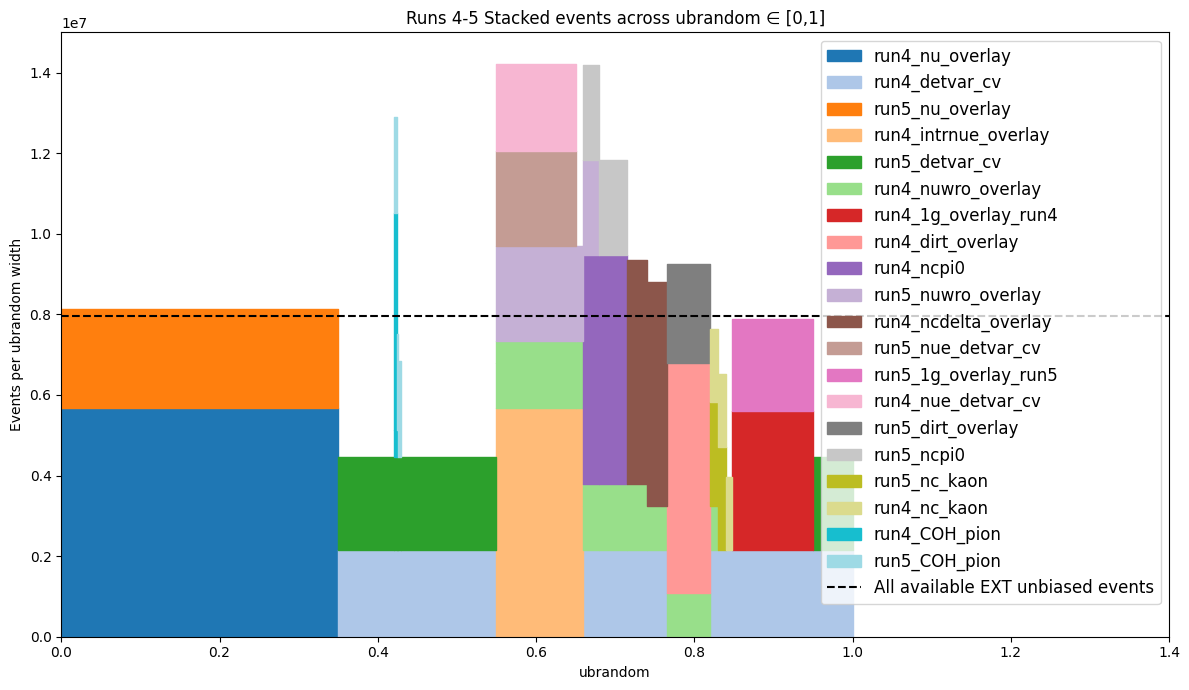

In [8]:
# --- Helper to extract intervals robustly ---
def get_intervals(r):
    # remove all spaces
    r = r.replace(" ", "")
    # match [start,end)
    matches = re.findall(r"\[([\d.]+),([\d.]+)\)", r)
    return [(float(a), float(b)) for a,b in matches]

# --- Build dataframe ---
df = pd.DataFrame({
    "filename": filenames,
    "events": pd.to_numeric(event_nums, errors="coerce"),
    "range": random_range_strs
}).dropna()

# Use filename as sample
df["sample"] = df["filename"]

# --- Collect all unique split points ---
split_points = set()
for r in df["range"]:
    intervals = get_intervals(r)
    for a,b in intervals:
        split_points.add(a)
        split_points.add(b)

split_points = sorted(split_points)
split_points = np.array(split_points)

# --- Expand each line into sub-intervals ---
expanded = []
for _, row in df.iterrows():

    print("considering sample: ", row["sample"])
    print(f"    {row['range']=}")
    print(f"    {get_intervals(row['range'])=}")

    intervals = get_intervals(row["range"])
    if not intervals:
        print("no intervals found for sample: ", row["sample"])
        continue
    
    # total width of all intervals for proportional distribution
    total_width = sum(end - start for start, end in intervals)
    
    for start, end in intervals:
        interval_width = end - start
        events_in_interval = row["events"] * (interval_width / total_width)
        
        for i in range(len(split_points)-1):
            sub_start = split_points[i]
            sub_end = split_points[i+1]
            # check overlap
            overlap_start = max(sub_start, start)
            overlap_end = min(sub_end, end)
            if overlap_end <= overlap_start:
                continue
            overlap_width = overlap_end - overlap_start
            events_in_subinterval = events_in_interval * (overlap_width / interval_width)
            expanded.append({
                "sample": row["sample"],
                "start": overlap_start,
                "end": overlap_end,
                "events": events_in_subinterval
            })

df2 = pd.DataFrame(expanded)

samples = df2["sample"].unique()

samples = sorted(samples, key=lambda x: df2[df2["sample"]==x]["events"].sum(), reverse=True)

colors = plt.cm.tab20.colors

fig, ax = plt.subplots(figsize=(12,7))
bottoms = np.zeros(len(split_points)-1)
already_labeled_sample_names = []
for i, sample in enumerate(samples):
    sample_intervals = df2[df2["sample"]==sample]
    for _, row in sample_intervals.iterrows():
        idx = np.where(split_points[:-1] == row["start"])[0][0]
        event_per_width = row["events"] / (row["end"] - row["start"])
        ax.fill_between(
            [row["start"], row["end"]],
            bottoms[idx:idx+1],
            bottoms[idx:idx+1] + event_per_width,
            step="post",
            color=colors[i % len(colors)],
            label=sample if sample not in already_labeled_sample_names else None
        )
        bottoms[idx:idx+1] += event_per_width
        already_labeled_sample_names.append(sample)
ax.axhline(y=num_run4_ext_unbiased_events + num_run5_ext_unbiased_events, color='black', linestyle='--', label="All available EXT unbiased events")
ax.set_xlim(0,1.4)
ax.set_ylim(0, 1.5e7)
ax.set_xlabel("ubrandom")
ax.set_ylabel("Events per ubrandom width")
ax.set_title("Runs 4-5 Stacked events across ubrandom ∈ [0,1]")
ax.legend(loc="upper right", fontsize=12)
plt.tight_layout()
plt.show()


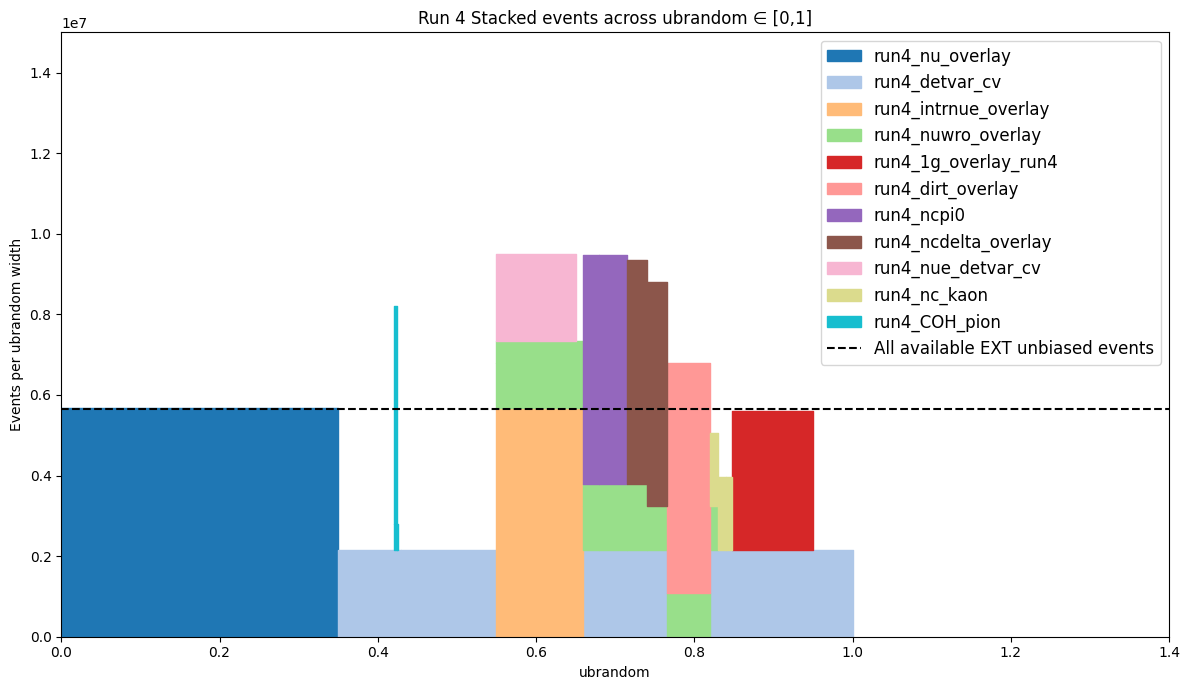

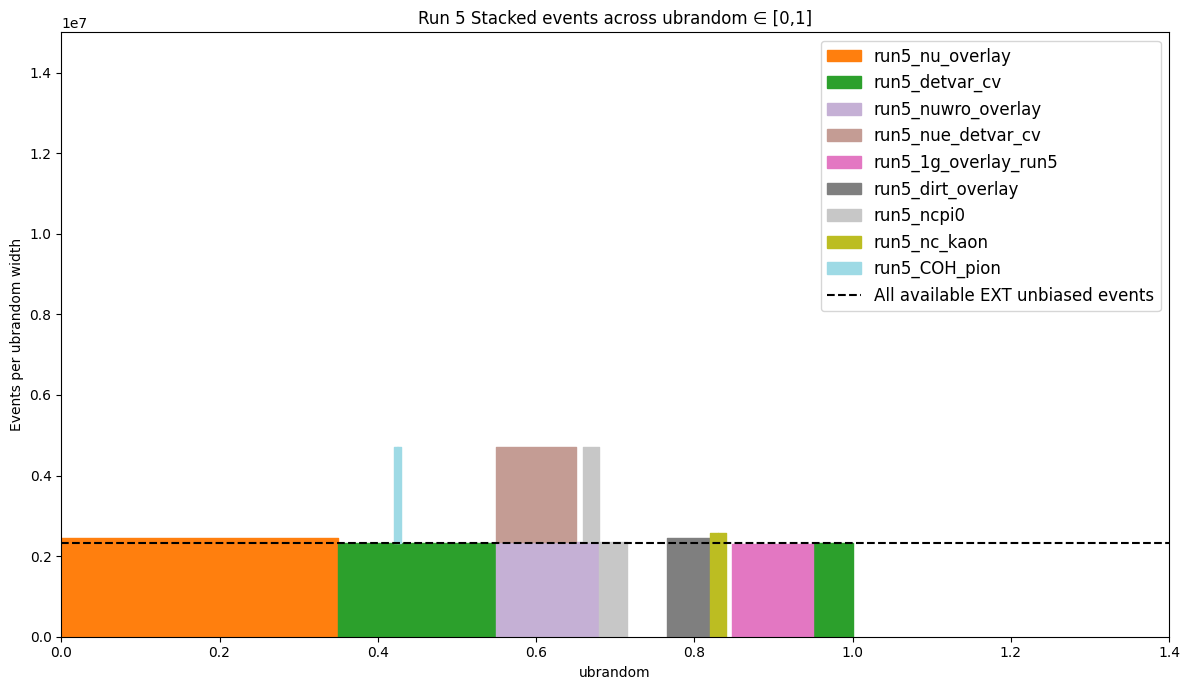

In [9]:

fig, ax = plt.subplots(figsize=(12,7))
bottoms = np.zeros(len(split_points)-1)
already_labeled_sample_names = []
for i, sample in enumerate(samples):
    if "run5" in sample:
        continue
    sample_intervals = df2[df2["sample"]==sample]
    for _, row in sample_intervals.iterrows():
        idx = np.where(split_points[:-1] == row["start"])[0][0]
        event_per_width = row["events"] / (row["end"] - row["start"])
        ax.fill_between(
            [row["start"], row["end"]],
            bottoms[idx:idx+1],
            bottoms[idx:idx+1] + event_per_width,
            step="post",
            color=colors[i % len(colors)],
            label=sample if sample not in already_labeled_sample_names else None
        )
        bottoms[idx:idx+1] += event_per_width
        already_labeled_sample_names.append(sample)
ax.axhline(y=num_run4_ext_unbiased_events, color='black', linestyle='--', label="All available EXT unbiased events")
ax.set_xlim(0,1.4)
ax.set_ylim(0, 1.5e7)
ax.set_xlabel("ubrandom")
ax.set_ylabel("Events per ubrandom width")
ax.set_title("Run 4 Stacked events across ubrandom ∈ [0,1]")
ax.legend(loc="upper right", fontsize=12)
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(12,7))
bottoms = np.zeros(len(split_points)-1)
already_labeled_sample_names = []
for i, sample in enumerate(samples):
    if "run4" in sample:
        continue
    sample_intervals = df2[df2["sample"]==sample]
    for _, row in sample_intervals.iterrows():
        idx = np.where(split_points[:-1] == row["start"])[0][0]
        event_per_width = row["events"] / (row["end"] - row["start"])
        ax.fill_between(
            [row["start"], row["end"]],
            bottoms[idx:idx+1],
            bottoms[idx:idx+1] + event_per_width,
            step="post",
            color=colors[i % len(colors)],
            label=sample if sample not in already_labeled_sample_names else None
        )
        bottoms[idx:idx+1] += event_per_width
        already_labeled_sample_names.append(sample)
ax.axhline(y=num_run5_ext_unbiased_events, color='black', linestyle='--', label="All available EXT unbiased events")
ax.set_xlim(0,1.4)
ax.set_ylim(0, 1.5e7)
ax.set_xlabel("ubrandom")
ax.set_ylabel("Events per ubrandom width")
ax.set_title("Run 5 Stacked events across ubrandom ∈ [0,1]")
ax.legend(loc="upper right", fontsize=12)
plt.tight_layout()
plt.show()
